In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path = "/content/gdrive/MyDrive/Quiz1MV/";

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [30]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=path+'photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


<IPython.core.display.Javascript object>

Saved to /content/gdrive/MyDrive/Quiz1MV/photo.jpg


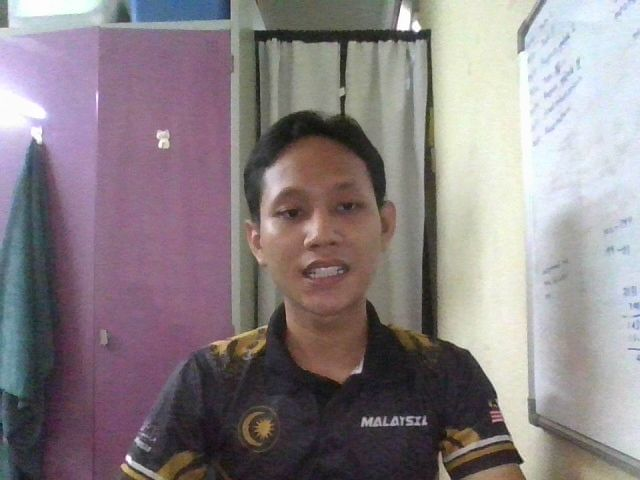

In [80]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

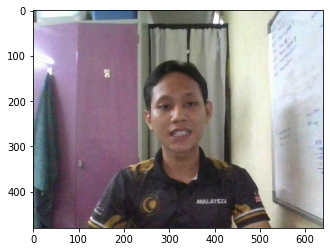

In [81]:
img = cv2.imread(path+'photo.jpg',cv2.IMREAD_COLOR);
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img_rgb);

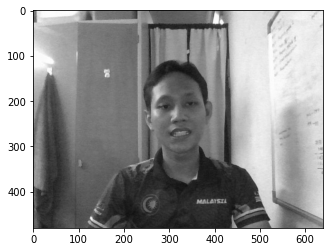

In [82]:
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY);
color_coverted = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB);
plt.imshow(color_coverted);

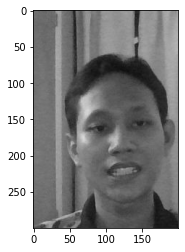

In [83]:
cropped_region = color_coverted[50:350, 200:400];
plt.imshow(cropped_region);

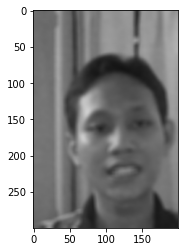

In [84]:
imgBlur = cv2.GaussianBlur(cropped_region,(7,7),5);
plt.imshow(imgBlur);

In [85]:
cv2.imwrite(path+'imgBlur.jpg', imgBlur)

True

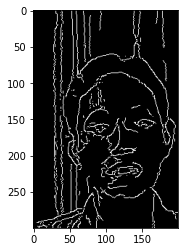

In [86]:
imgCanny = cv2.Canny(imgBlur,40,15);
plt.imshow(imgCanny, cmap='gray');

In [87]:
cv2.imwrite(path+'imgCanny.jpg', imgCanny)

True

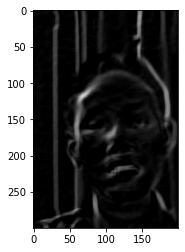

In [88]:
sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3);
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3);
imgSobel = sobelx + sobely;
plt.imshow(imgSobel);

In [89]:
# save the image
cv2.imwrite(path+'imgSobel.jpg', imgSobel)

True